In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
dataset = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [15]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=25,metric ='minkowski')
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
y_pred


array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

In [25]:
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n ',cm)

Accuracy:  0.9473684210526315
Confusion matrix:
  [[39  4]
 [ 2 69]]


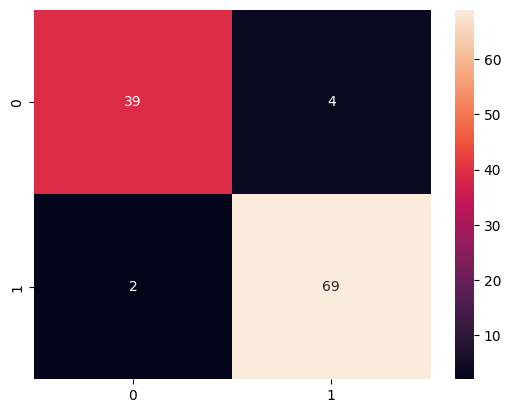

In [26]:
from seaborn import heatmap
sns.heatmap(cm,annot=True)
plt.show()


Task-2 Credit Risk Dataset

In [28]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [29]:
df = pd.read_csv('credit_risk_dataset.csv')

In [30]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [31]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [33]:
df['person_emp_length']= df['person_emp_length'].fillna(df['person_emp_length'].mean())

In [34]:
df['loan_int_rate']= df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [35]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [37]:
df[['person_age','person_income','loan_amnt','cb_person_cred_hist_length']]

,person_age,person_income,loan_amnt,cb_person_cred_hist_length
0,22,59000,35000,3
1,21,9600,1000,2
2,25,9600,5500,3
3,23,65500,35000,2
4,24,54400,35000,4
...,...,...,...,...
32576,57,53000,5800,30
32577,54,120000,17625,19
32578,65,76000,35000,28
32579,56,150000,15000,26


### Distribution of Customer Attributes

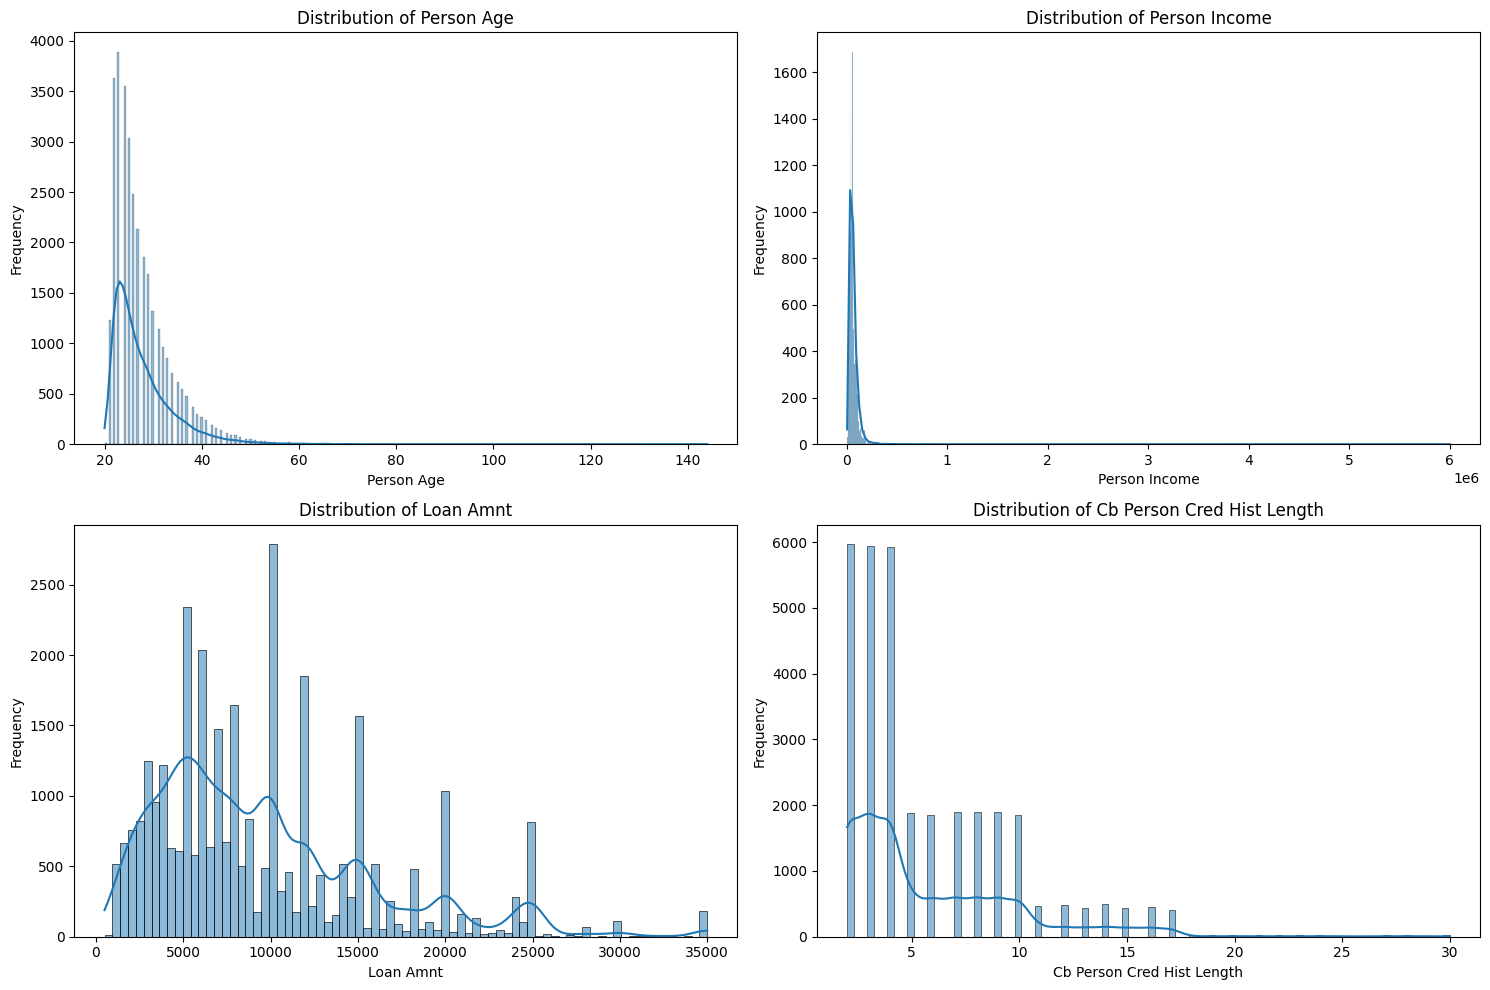

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


customer_attributes = ['person_age', 'person_income', 'loan_amnt', 'cb_person_cred_hist_length']

plt.figure(figsize=(15, 10))
for i, col in enumerate(customer_attributes):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace('_', ' ').title()}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [41]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [42]:
selected_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'cb_person_default_on_file'
]

X = X[selected_features]


In [43]:
X = pd.get_dummies(X, drop_first=True)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=75, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=75)

In [61]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8235384379315636
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5072
           1       0.73      0.33      0.45      1445

    accuracy                           0.82      6517
   macro avg       0.78      0.65      0.67      6517
weighted avg       0.81      0.82      0.80      6517



In [62]:
for k in [3, 5, 7, 9, 11]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} → Accuracy = {acc:.4f}")


K = 3 → Accuracy = 0.7998
K = 5 → Accuracy = 0.8087
K = 7 → Accuracy = 0.8159
K = 9 → Accuracy = 0.8154
K = 11 → Accuracy = 0.8154


In [63]:
new_customer = [[
    30,
    500000,
    5,
    12000,
    0.25,
    6,
    1
]]

new_customer_scaled = scaler.transform(new_customer)
risk = knn.predict(new_customer_scaled)

print("Risk:", "High Risk" if risk[0] == 1 else "Low Risk")


Risk: Low Risk


In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
cm = confusion_matrix(y_test, y_pred)

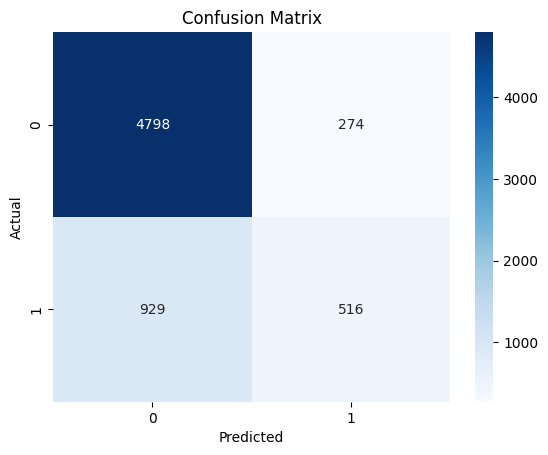

In [66]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:

counts = y.value_counts()

print("Safe (Low Risk) customers :", counts.get(0, 0))
print("Risky (High Risk) customers:", counts.get(1, 0))


Safe (Low Risk) customers : 25473
Risky (High Risk) customers: 7108


In [69]:
df.shape

(32581, 12)